
# 🛸 NUFORC UFO Highlights - Textual Analysis in Python (Student Version)

Welcome to this notebook! 🎓  
Here we will analyze a dataset of **UFO sighting highlights** from the NUFORC database.

The goal of this notebook is **not only to run code**, but also to **explain every step carefully** so you understand:
- What each block of code does
- Why we are using specific Python libraries
- How the analysis methods work conceptually

This is designed for learning purposes — imagine this as a mix of code, textbook, and instructor notes ✨.


## 1. Loading and Inspecting the Dataset

In [1]:

# First we import pandas, a powerful library for handling tabular data (like spreadsheets).
import pandas as pd

# Load the UFO dataset. The file path may need adjusting depending on your environment.
df = pd.read_csv(r"C:\git\DATA-501-Group-Project-UFO-Sightings-Data-Analysis\data\nuforc_highlights.csv")

# Let's look at basic information about the dataset:
# .info() tells us about number of rows, columns, data types, and missing values.
# .head() shows the first 5 rows of the dataset so we can see what the data looks like.
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1818 entries, 0 to 1817
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Link         1800 non-null   object
 1   Occurred     1800 non-null   object
 2   City         1782 non-null   object
 3   State        1782 non-null   object
 4   Country      1800 non-null   object
 5   Shape        1800 non-null   object
 6   Summary      1800 non-null   object
 7   Media        774 non-null    object
 8   Explanation  144 non-null    object
dtypes: object(9)
memory usage: 128.0+ KB


,Link,Occurred,City,State,Country,Shape,Summary,Media,Explanation
0,Open !,10/06/2025 20:27,Skaneateles,NY,USA,Disk,"Spinning lights changing color, 40 foot long f...",NaN,NaN
1,Open !,10/05/2025 21:19,Joplin,MO,USA,Changing,Our location continues to have close encounter...,Y,NaN
2,Open !,10/05/2025 19:30,Houma,LA,USA,Disk,Strange object photographed from oil rig in th...,Y,NaN
3,Open !,10/03/2025 03:00,Bangkok,Krung Thep Maha Nakhon,Thailand,Other,I was in bed.I went to the bathroom.I see an s...,Y,NaN
4,Open !,09/30/2025 00:29,Lisbon,Lisbon,Portugal,Formation,Crafts coming out of the atlantic ocean,NaN,NaN



## 2. Text Preprocessing 🧹

Raw text is messy — people use different words, capital letters, punctuation, etc.  
Before doing analysis, we need to **clean and standardize the text** so that words can be compared fairly.

Typical steps in preprocessing:
1. **Lowercasing**: "Light" and "light" should be treated as the same word.  
2. **Removing punctuation/numbers**: Commas, periods, and digits don't usually add meaning.  
3. **Tokenization**: Splitting sentences into individual words.  
4. **Stopword removal**: Removing very common words like "the", "and", "is" which don't add meaning.  

We will use **NLTK (Natural Language Toolkit)** for stopword removal.


In [2]:

import re
import nltk
from nltk.corpus import stopwords

# Download the stopwords list if not already available.
nltk.download('stopwords')

# Define English stopwords (you could also add custom words here if needed).
stop_words = set(stopwords.words("english"))

# Function to clean a single piece of text (one UFO sighting summary).
def clean_text(text):
    if pd.isna(text):  # Handle missing values gracefully
        return ""
    # 1. Lowercase all characters
    text = text.lower()
    # 2. Remove punctuation and numbers using regex
    text = re.sub(r"[^a-z\s]", "", text)
    # 3. Tokenize (split into words)
    tokens = text.split()
    # 4. Remove stopwords (like 'the', 'and', 'is')
    tokens = [t for t in tokens if t not in stop_words]
    # Join tokens back into a string
    return " ".join(tokens)

# Apply cleaning to the "Summary" column
df["CleanSummary"] = df["Summary"].apply(clean_text)

# Let's compare before and after cleaning for the first few rows
df[["Summary", "CleanSummary"]].head()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\bdupey\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Summary,CleanSummary
0,"Spinning lights changing color, 40 foot long f...",spinning lights changing color foot long flyin...
1,Our location continues to have close encounter...,location continues close encounters first seco...
2,Strange object photographed from oil rig in th...,strange object photographed oil rig gulf stati...
3,I was in bed.I went to the bathroom.I see an s...,bedi went bathroomi see submarinelike object sky
4,Crafts coming out of the atlantic ocean,crafts coming atlantic ocean



## 3. Word Frequency Analysis 🔤

Now that we have clean text, let's see **which words are most common** in UFO sighting reports.  

This is useful because:
- It highlights recurring themes ("light", "sky", "bright").  
- It shows us vocabulary typical of witness reports.  

We'll use Python's built-in `collections.Counter` to count word frequencies.


In [3]:

from collections import Counter

# Combine all summaries into one big string, then split into words
all_words = " ".join(df["CleanSummary"]).split()

# Count word frequencies
word_counts = Counter(all_words)

# Show the 20 most common words
word_counts.most_common(20)


[('lights', 486),
 ('saw', 396),
 ('craft', 396),
 ('object', 324),
 ('shaped', 306),
 ('light', 306),
 ('bright', 270),
 ('white', 252),
 ('sky', 234),
 ('black', 198),
 ('red', 198),
 ('large', 198),
 ('triangle', 198),
 ('silent', 180),
 ('moved', 162),
 ('hovering', 162),
 ('huge', 162),
 ('moving', 162),
 ('ufo', 162),
 ('flying', 144)]

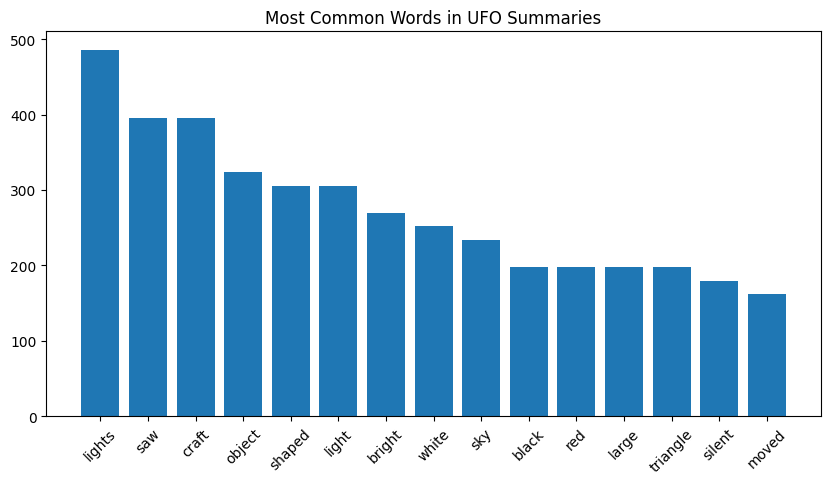

In [4]:

import matplotlib.pyplot as plt

# Prepare data for plotting
common_words = word_counts.most_common(15)
words, counts = zip(*common_words)

# Create a bar chart of most common words
plt.figure(figsize=(10,5))
plt.bar(words, counts)
plt.title("Most Common Words in UFO Summaries")
plt.xticks(rotation=45)
plt.show()



## 4. N-Gram (Phrase) Analysis 📚

A **unigram** is a single word, but sometimes meaning comes from combinations:  
- "bright light" (bigram = 2 words)  
- "strange bright object" (trigram = 3 words)  

We'll use **NLTK's ngrams function** to extract the most frequent phrases.


In [5]:

from nltk import ngrams

def get_top_ngrams(corpus, n=2, top_k=15):
    tokens = " ".join(corpus).split()
    n_grams = ngrams(tokens, n)
    return Counter(n_grams).most_common(top_k)

print("Top Bigrams:", get_top_ngrams(df["CleanSummary"], n=2))
print("Top Trigrams:", get_top_ngrams(df["CleanSummary"], n=3))


Top Bigrams: [(('bright', 'white'), 90), (('white', 'lights'), 90), (('bright', 'light'), 90), (('shaped', 'object'), 90), (('shaped', 'craft'), 72), (('triangular', 'craft'), 72), (('triangle', 'craft'), 54), (('red', 'white'), 54), (('slowly', 'moving'), 54), (('shape', 'uap'), 36), (('dull', 'black'), 36), (('lights', 'bright'), 36), (('white', 'orb'), 36), (('saw', 'grey'), 36), (('saucer', 'shaped'), 36)]
Top Trigrams: [(('saucer', 'shaped', 'craft'), 36), (('hovering', 'tree', 'line'), 36), (('floating', 'slowly', 'moving'), 36), (('red', 'white', 'lights'), 36), (('spinning', 'lights', 'changing'), 18), (('lights', 'changing', 'color'), 18), (('changing', 'color', 'foot'), 18), (('color', 'foot', 'long'), 18), (('foot', 'long', 'flying'), 18), (('long', 'flying', 'saucer'), 18), (('flying', 'saucer', 'sound'), 18), (('saucer', 'sound', 'close'), 18), (('sound', 'close', 'location'), 18), (('close', 'location', 'continues'), 18), (('location', 'continues', 'close'), 18)]



## 5. Word Cloud ☁️

A **word cloud** is a visualization where:  
- The size of each word represents how often it appears.  
- It's a quick way to see the "theme" of the dataset.  

We'll generate one for the UFO summaries.


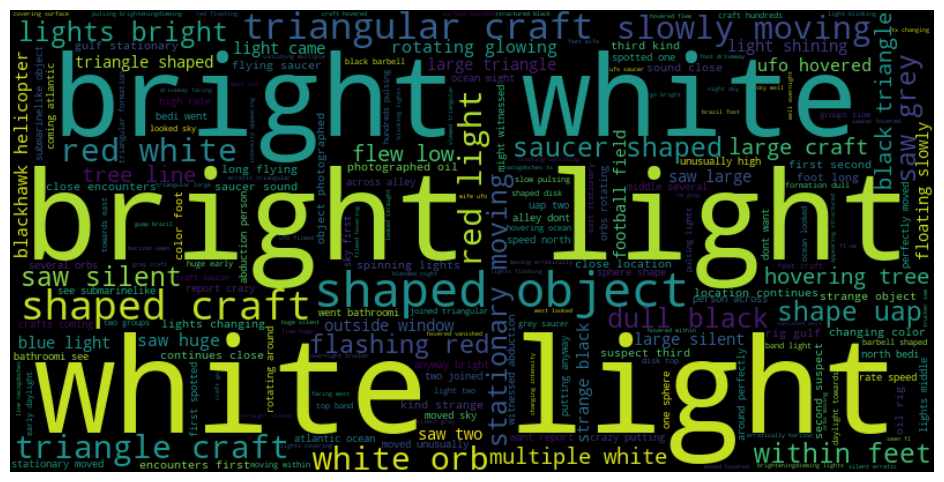

In [6]:

from wordcloud import WordCloud

# Join all clean summaries into one text
text = " ".join(df["CleanSummary"])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color="black").generate(text)

# Display the word cloud
plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()



## 6. TF-IDF Analysis 📊

**TF-IDF (Term Frequency - Inverse Document Frequency)** is a technique to find words that are:  
- Common in one document, but  
- Not too common across all documents.  

This helps highlight **unique or distinctive words**.  
For example, if one report talks about "triangular" objects, TF-IDF will give that word a higher score.


In [7]:

from sklearn.feature_extraction.text import TfidfVectorizer

# Convert text into TF-IDF matrix
vectorizer = TfidfVectorizer(max_features=1000)
X = vectorizer.fit_transform(df["CleanSummary"])

# Calculate overall TF-IDF scores
tfidf_scores = zip(vectorizer.get_feature_names_out(), X.sum(axis=0).tolist()[0])
sorted_terms = sorted(tfidf_scores, key=lambda x: x[1], reverse=True)[:20]

print("Top TF-IDF terms:")
for term, score in sorted_terms:
    print(term, score)


Top TF-IDF terms:
lights 85.02323342400328
craft 79.91857333058822
object 70.96369014753718
shaped 69.28014550215075
saw 64.87201547612337
light 60.47603642603716
bright 55.900921248529535
white 55.79786210689311
black 54.45702718366321
large 53.38354237906534
sky 48.63672035749276
triangle 46.841454187676064
red 46.58065911577664
hovering 45.598407527625724
silent 42.9558604386375
ufo 40.97128470685457
moving 38.6765908011652
flying 38.2792572224453
moved 35.61060845210073
huge 35.49749621706867



## 7. Topic Modeling with LDA 🧠

Sometimes we want to automatically discover **themes** in the data.  
Topic modeling algorithms (like **Latent Dirichlet Allocation**) can group words into "topics".  

Example:  
- Topic 1: ["light", "bright", "sky", "flash"]  
- Topic 2: ["object", "shape", "disk", "triangle"]


In [8]:

from sklearn.decomposition import LatentDirichletAllocation

# Reduce to smaller feature set for speed
vectorizer = TfidfVectorizer(max_features=500)
X = vectorizer.fit_transform(df["CleanSummary"])

lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(X)

terms = vectorizer.get_feature_names_out()

# Print top 10 words for each topic
for idx, topic in enumerate(lda.components_):
    print(f"Topic {idx}:")
    print([terms[i] for i in topic.argsort()[-10:]])
    print()


Topic 0:
['object', 'line', 'silver', 'shining', 'white', 'moved', 'sky', 'ocean', 'light', 'hovering']

Topic 1:
['ufo', 'shaped', 'craft', 'object', 'multiple', 'feet', 'large', 'disk', 'within', 'lights']

Topic 2:
['like', 'flying', 'lights', 'metallic', 'north', 'altitude', 'disc', 'hovering', 'high', 'huge']

Topic 3:
['outside', 'black', 'shape', 'saw', 'ft', 'craft', 'orb', 'large', 'object', 'shaped']

Topic 4:
['house', 'west', 'close', 'triangular', 'saw', 'flew', 'silent', 'bright', 'lights', 'craft']




## 8. Sentiment Analysis 🙂😨

We can try to measure **emotions or tone** in the reports.  
Sentiment analysis gives us two values:  
- **Polarity**: Is the sentence positive (+1) or negative (-1)?  
- **Subjectivity**: Is it factual (0) or opinionated (1)?  

We'll use **TextBlob**, a simple library for sentiment analysis.


In [9]:

from textblob import TextBlob

# Apply sentiment analysis to each summary
df["Polarity"] = df["Summary"].apply(lambda x: TextBlob(str(x)).sentiment.polarity)
df["Subjectivity"] = df["Summary"].apply(lambda x: TextBlob(str(x)).sentiment.subjectivity)

# Show some examples with their sentiment scores
df[["Summary", "Polarity", "Subjectivity"]].head()


,Summary,Polarity,Subjectivity
0,"Spinning lights changing color, 40 foot long f...",-0.1250,0.400000
1,Our location continues to have close encounter...,0.2125,0.308333
2,Strange object photographed from oil rig in th...,0.0550,0.345000
3,I was in bed.I went to the bathroom.I see an s...,0.0000,0.000000
4,Crafts coming out of the atlantic ocean,0.0000,0.000000



## 9. Geographic Distribution 🌎

Finally, let's see where most reports come from.  
We'll count sightings by **US state** and show the top 15.


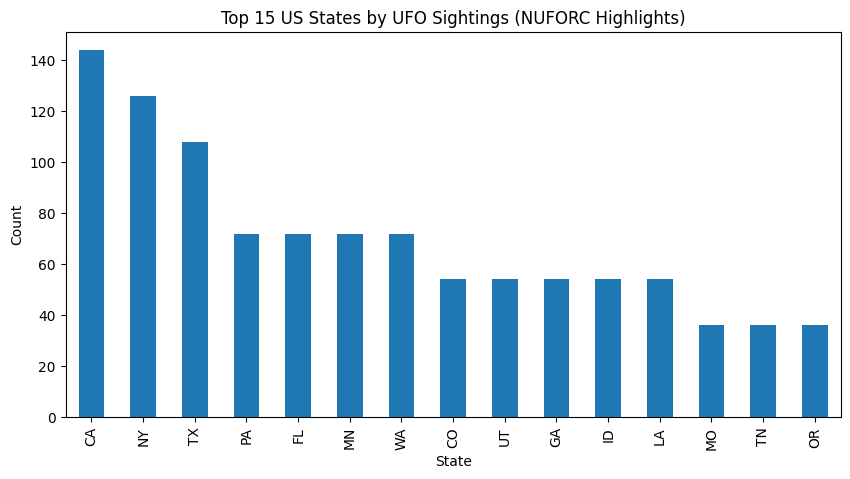

In [10]:

# Filter only USA rows and count reports by state
state_counts = df[df["Country"]=="USA"]["State"].value_counts().head(15)

# Plot the top states
plt.figure(figsize=(10,5))
state_counts.plot(kind="bar")
plt.title("Top 15 US States by UFO Sightings (NUFORC Highlights)")
plt.ylabel("Count")
plt.show()
